##Importando Bibliotecas

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

##Carregando Base
 - esta base consistem em avaliações de filmes no imdb
 - essas avaliacoes estão classificadas como positivas e negativas
 - vamos utilizar essa base para entender mecanismos utilizados para liguagem natural em machine leaning 

In [ ]:
#você pode encontrar o arquivo da base no site kaggle em: kaggle.com/luisfredgs/imdb-ptbr
base = pd.read_csv('imdb-reviews-pt-br.csv')

base.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
#verificando instancias da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
#criando a coluna para respostas 
classes = base['sentiment'].replace(['neg', 'pos'], [0, 1])

In [ ]:
base['classes'] = classes

base.head()

,id,text_en,text_pt,sentiment,classes
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


##Bag of Words
 - forma mais simples de conversao entre conjuntos de palavras para matrizes de numeros
 - utilizaremos uma funcão de regressao linear para fazer o nosso primeiro modelo

In [ ]:
#na funcao CountVectorizer vamos desconsiderar a letras maiusculas
#é necesssario atribuir um valor max_features caso contrario sera presico criar um vocabulario com frequencias variadas de palavras 
vector = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vector.fit_transform(base.text_pt) #criando nossa matriz de numeros
print(bag_of_words)

  (0, 48)	2
  (0, 47)	3
  (0, 19)	1
  (0, 34)	2
  (0, 27)	4
  (0, 24)	2
  (0, 8)	4
  (0, 36)	7
  (0, 7)	4
  (0, 29)	3
  (0, 18)	3
  (0, 30)	4
  (0, 26)	2
  (0, 4)	2
  (0, 9)	2
  (0, 45)	1
  (0, 35)	2
  (0, 11)	1
  (0, 5)	1
  (0, 1)	1
  (0, 40)	1
  (0, 41)	1
  (0, 31)	1
  (0, 39)	1
  (0, 32)	1
  :	:
  (49457, 0)	1
  (49457, 3)	2
  (49457, 6)	1
  (49458, 48)	5
  (49458, 47)	4
  (49458, 8)	3
  (49458, 36)	3
  (49458, 7)	11
  (49458, 30)	3
  (49458, 1)	1
  (49458, 31)	2
  (49458, 33)	2
  (49458, 20)	1
  (49458, 43)	1
  (49458, 38)	1
  (49458, 13)	2
  (49458, 49)	1
  (49458, 37)	1
  (49458, 25)	2
  (49458, 12)	1
  (49458, 46)	2
  (49458, 3)	1
  (49458, 6)	1
  (49458, 2)	1
  (49458, 22)	1


In [ ]:
#separando dados para teste e para treino
x = bag_of_words
y = base['classes']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42, test_size=0.25)

In [ ]:
#criar modelo
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

#taxa de acertos
acertos = (modelo.score(x_teste, y_teste)*100)
print('primeiro modelo possui uma quantida de acertos de: %.2f' %acertos + '%')

primeiro modelo possui uma quantida de acertos de: 65.83%


##Word Cloud
 - esta função é uma maneira de visualizar quais palavras aparecem com maior frequencia na base trabalhada

In [ ]:
from wordcloud import WordCloud

palavras = ' '.join([texto for texto in base.text_pt]) #criando uma lista com os textos da base

#gerando a nuvem de palavras que no caso retornara as palavras mais frequentes
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110, collocations = False).generate(palavras)

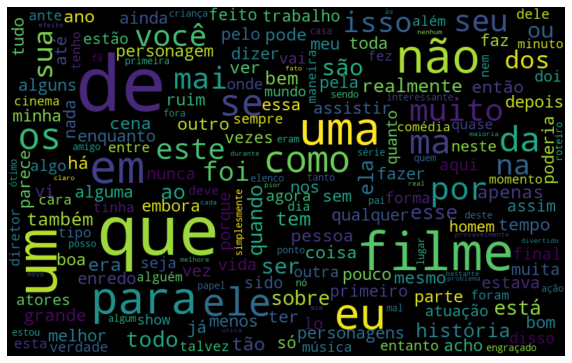

In [ ]:
#mostrando a nuvem
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()
#perceba que futuramento vamos precisar retirar muitas dessas palavras que aparecem nesta nuvem

##Tokenização
 - funcao de segmentacao de palavras entre os textos 
 - consiste em organizar conjuntos de palavras em tokens e atribuir valores
 - vale ressaltar que essa funcão pode remover acentos para facilitar a classificacao

In [ ]:
import nltk
from nltk import tokenize

#basicamente a tokenizacao que utilizaremos sera por espaco em branco
token_espaco = tokenize.WhitespaceTokenizer()
token_palavras = token_espaco.tokenize(palavras) #tokenizando a lista todas_palavras que contem a coluna text_pt

#transformando a tokenização em um data frame que mostra as palavras com a maior frequencia
frequencia = nltk.FreqDist(token_palavras)

df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência": list(frequencia.values())})
df_frequencia.nlargest(columns = "Frequência", n = 10) #palavras que mais aparecem no data frame
#perceba que as palavras com maior frequencia não possuem um sentido muito claro para atribuirmos como sendo de um texto positivo ou negativo

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


##Stop Words
 - remoção de artigos e preposições
 - quando os textos estão repletos de "a", "o", "e" e conectivos da linguagem em geral fica cada vez mais complidado do modelo aprender o que classificar 
 

In [ ]:
#baixando espancao do pacote nlt para removermos palavras inuteis da base
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
#agora vamos remover as stop words da base para facilitar o treinamento do proximo modelo
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in base.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        #verifica se a palava percorida pela tokenizacao pertence ao corpus de palavras stop word da lingua portuguesa
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase)) #nova 
    
base["tratamento1"] = frase_processada

In [ ]:
#criando bag of word, separando base e treiando novo modelo

bag_of_words = vector.fit_transform(base.tratamento1)
x = bag_of_words
y = base['classes']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42, test_size=0.25)

modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

acertos = (modelo.score(x_teste, y_teste)*100)
print('segundo modelo possui um percentual de acertos de: %.2f' %acertos + '%')
#perceba que o aumento não foi muito grande
#pois possivelmente ainda temos muitas palavras com significados arbitrarios, tal como, acentos, simbolos, letras maiusculas etc

segundo modelo possui um percentual de acertos de: 66.07%


##Outros tratamentos
 - remover pontuacao
 - remover acento
 - remover letras maiusculas

In [ ]:
#remocao de pontuacao
from string import punctuation

#aqui vamos precisar da tokenizacao por acentos
token_pontuacao = tokenize.WordPunctTokenizer()

#criando uma lista de stop Words de pontuacao
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes #aqui nos juntamos com as stopwords anteriormente tratadas

#realizando o precesso semelhante
frase_processada = list()
for opiniao in base["tratamento1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao) #perceba que o tipo de tokenizacao agora é de pontuacao
    for palavra in palavras_texto:
      #verifica se a palava percorida pela tokenizacao pertence ao corpus de palavras stop word que criamos
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
base["tratamento2"] = frase_processada

In [ ]:
#intalando unidecode para removermos acentos
!pip install unidecode

     |████████████████████████████████| 245kB 8.0MB/s 


In [ ]:
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in base["tratamento2"]] #criando uma lista para tratamento
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords] #perceba que usamos sempre o conjunto de stop words criadas anteriormente

base["tratamento3"] = sem_acentos

frase_processada = list()
for opiniao in base["tratamento3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
      #verifica se a palava percorida pela tokenizacao pertence ao corpus de palavras stop word que criamos
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
base["tratamento3"] = frase_processada

In [ ]:
#removendo letras maiusculas
frase_processada = list()
for opiniao in base["tratamento3"]:
    nova_frase = list()
    opiniao = opiniao.lower() #forcamos a lista a setar letras como minusculas
    palavras_texto = token_pontuacao.tokenize(opiniao) 
    for palavra in palavras_texto:
      #verifica se a palava percorida pela tokenizacao pertence ao corpus de palavras stop word que criamos
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
base["tratamento4"] = frase_processada

In [ ]:
#verificando novas colunas
base.head()

,id,text_en,text_pt,sentiment,classes,tratamento1,tratamento2,tratamento3,tratamento4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [ ]:
#depois de fazer varios ajustes agora vamos treinar um novo modelo
bag_of_words = vector.fit_transform(base.tratamento4)
x = bag_of_words
y = base['classes']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42, test_size=0.25)

modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

acertos = (modelo.score(x_teste, y_teste)*100)
print('terceiro modelo possui um percentual de acertos de: %.2f' %acertos + '%')
#tivemos uma melhora mas não muito significativa
#teremos que usar outras tecnicas se quisermos melhorar nosso modelo para classificar os textos

terceiro modelo possui um percentual de acertos de: 68.79%


##Stemmer
 - consiste em reduzir as palavras a um radical comum

In [ ]:
stemmer = nltk.RSLPStemmer()

#realizando um processo semelhante aos anteriores
frase_processada = list()
for opiniao in base["tratamento4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        #aqui possuimos uma condicao para remover as palavras que pertencem ao stop Word que ja criamos anteriormente
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra)) #agora adicionamos as palavars com radical reduzido na lista
    frase_processada.append(' '.join(nova_frase))
    
base["tratamento5"] = frase_processada

In [ ]:
#analise a coluna de tratemto 5 para vez como as palavras estao sem radical
base.head()

,id,text_en,text_pt,sentiment,classes,tratamento1,tratamento2,tratamento3,tratamento4,tratamento5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [ ]:
#vamos realizar um novo treinamento com a palavras sem radical
bag_of_words = vector.fit_transform(base.tratamento5)
x = bag_of_words
y = base['classes']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42, test_size=0.25)

modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

acertos = (modelo.score(x_teste, y_teste)*100)
print('quarto modelo possui um percentual de acertos de: %.2f' %acertos + '%')

quarto modelo possui um percentual de acertos de: 69.44%


##TF-IDF
 - a tecninca de TF-IDF server para aplicar valores a deteminadas palavras
 - quando uma palavatra tem uma frequancia muito alta seu valor sera diminuido

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_bruto = tfidf.fit_transform(base["text_pt"])#aplicando TF-IDF sem nenhum tratamento

#realizando processo de separar dados e treinar um modelo
x_treino, x_teste, y_treino, y_teste = train_test_split(tfidf_bruto, base["classes"], random_state = 42)

modelo.fit(x_treino, y_treino)
acuracia_tfidf_bruto = (modelo.score(x_teste, y_teste)*100)
print('quinto modelo possui uma percentual de acertos de: %.2f' %acuracia_tfidf_bruto + '%')

quinto modelo possui uma percentual de acertos de: 66.01%


In [ ]:
#agora vamos aplicar com  os trametos de stop words que realizamos
#realizando o mesmo processo de separar e treinar dados
tfidf_tratados = tfidf.fit_transform(base["tratamento5"])

x_treino, x_teste, y_treino, y_teste = train_test_split(tfidf_tratados, base["classes"], random_state = 42)

modelo.fit(x_treino, y_treino)
acuracia_tfidf_tratados = (modelo.score(x_teste, y_teste)*100)
print('sexto modelo possui percentual de acertos de: %.2f' %acuracia_tfidf_tratados + '%')

sexto modelo possui percentual de acertos de: 69.88%


##ngrams
 - os ngramas definem conjuntos de palavras para estabelecer um melhor valor semantico na classificação
 - ngrams geram memoria para o treinamento

In [ ]:
from nltk import ngrams

#em ngram_range define os limites inferiores e superiores
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))

vetor_tfidf = tfidf.fit_transform(base["tratamento5"])

In [ ]:
#realizando o mesmo treinamento anterior com TF-IDF 
#porem possuimos os valores de ngrams agora estabelecidos na instancia tfidf
tfidf_tratados = tfidf.fit_transform(base["tratamento5"])

x_treino, x_teste, y_treino, y_teste = train_test_split(tfidf_tratados, base["classes"], random_state = 42)

modelo.fit(x_treino, y_treino)
acuracia_tfidf_tratados = (modelo.score(x_teste, y_teste)*100)
print('setimo modelo possui percentual de acertos de: %.2f' %acuracia_tfidf_tratados + '%')
#agora o nosso modelo possui um percentual de acertos sigficativamente melhor 

setimo modelo possui percentual de acertos de: 88.59%
